 #                             Telecom Customer Churn Prediction M.L

### Necessary packages for Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading dataset 
train = pd.read_csv('churn-bigml-80.csv')
test  = pd.read_csv('churn-bigml-20.csv')
#concat two files
dataset = pd.concat([train,test],ignore_index=True)

In [3]:
#shape of dataset
print("\n",'Shape of dataset :',"\n"
      ,"------------------","\n"
      "","No of rows :",dataset.shape[0],"\n"
      '',"No of columns :",dataset.shape[1]) 
#summary of dataset 
print();print(" Summary of dataset : ","\n"
     ,"--------------------",)
dataset.info()


 Shape of dataset : 
 ------------------ 
 No of rows : 3333 
 No of columns : 20

 Summary of dataset :  
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minu

In [4]:
#viewing the first five data
dataset.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#viewing the last five data
dataset.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3332,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
#unique values in each cloumn 
print("\n",'Unique values in each column: '"\n"
      "-----------------------------")
dataset.nunique() 


 Unique values in each column: 
-----------------------------


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [7]:
#check for missing values
print()
print('missing values in each column: ',"\n"
      "------------------------------")
dataset.isna().sum()


missing values in each column:  
------------------------------


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#Churn percentage 
print("Dataset Churn percentage : ","\n"
      "--------------------------")
print(round(100*dataset['Churn'].value_counts()/len(dataset['Churn']),2))
print()
print("Dataset Churn values : ","\n"
      "----------------------")
dataset['Churn'].value_counts()

Dataset Churn percentage :  
--------------------------
False    85.51
True     14.49
Name: Churn, dtype: float64

Dataset Churn values :  
----------------------


False    2850
True      483
Name: Churn, dtype: int64

We can see that the Churn percentage for our dataset is 14.49% and the total no of Churns is 489.

## Ploting of data 

415    49.65
510    25.20
408    25.14
Name: Area code, dtype: float64


,Area code,Churn
2,510,0.148810
0,408,0.145585
1,415,0.142598


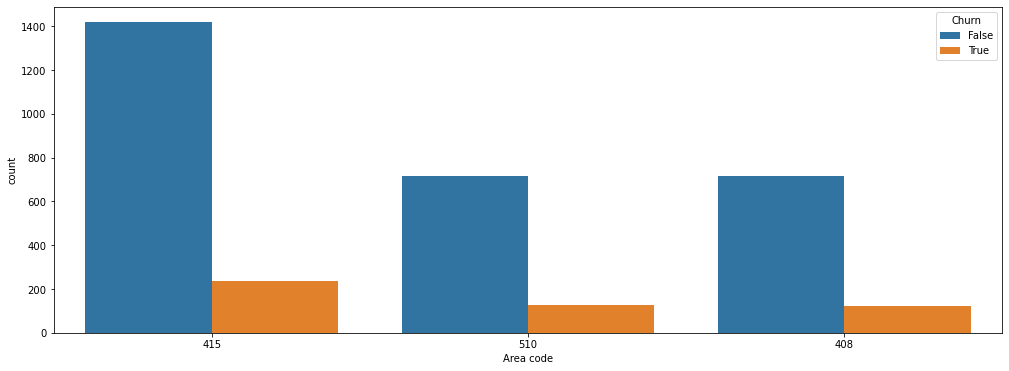

In [10]:
#Area code 
plt.figure(figsize=(17,6))
ax=sns.countplot(x='Area code',hue='Churn',data=dataset,order=dataset['Area code'].value_counts().index)
print(round(100*dataset['Area code'].value_counts()/len(dataset['Area code']),2))   
dataset[['Area code','Churn']].groupby(['Area code'],as_index=False).mean().sort_values(by ='Churn',ascending= False)

We can see that Area code 415 have got the highest no of customer which is almost 50% of our dataset. follewed by  Area code 510 having 25.25% and 408 having 25.14%.
But the churn percentage of each area code is almost similar lying in between 14-15%.

No     90.31
Yes     9.69
Name: International plan, dtype: float64


,International plan,Churn
1,Yes,0.424149
0,No,0.114950


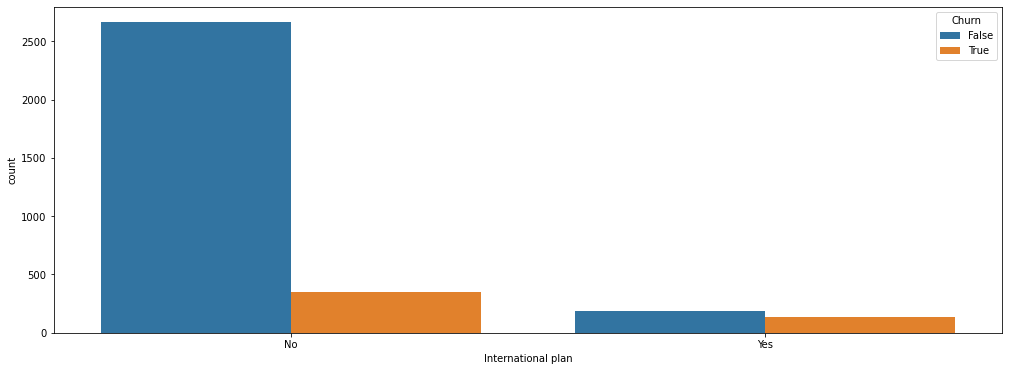

In [11]:
#International plan 
plt.figure(figsize=(17,6))
ax=sns.countplot(x='International plan',hue='Churn',data=dataset,order=dataset['International plan'].value_counts().index)
print(round(100*dataset['International plan'].value_counts()/len(dataset['International plan']),2))
dataset[['International plan','Churn']].groupby(['International plan'],
                  as_index=False).mean().sort_values(by ='Churn',ascending= False)

From above figure we can see that around 10% of the customer have taken International plan and out of that 42.42% have churned.

2.70    1.86
3.05    1.77
2.94    1.68
2.65    1.68
2.86    1.59
        ... 
4.83    0.03
0.59    0.03
0.35    0.03
5.10    0.03
4.94    0.03
Name: Total intl charge, Length: 162, dtype: float64


,Total intl charge,Churn
161,5.40,1.000000
158,4.94,1.000000
155,4.83,1.000000
151,4.67,0.666667
118,3.75,0.647059
...,...,...
16,1.00,0.000000
15,0.97,0.000000
14,0.95,0.000000
13,0.92,0.000000


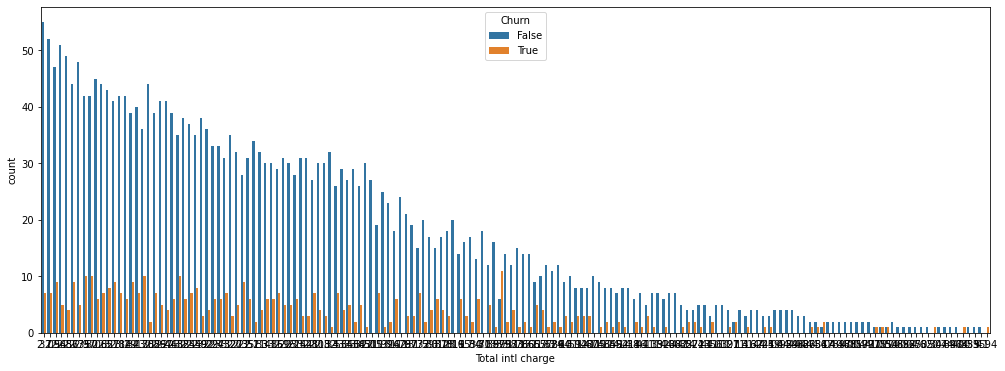

In [12]:
#total international charge
plt.figure(figsize=(17,6))
ax=sns.countplot(x='Total intl charge',hue='Churn',data=dataset,order=dataset['Total intl charge'].value_counts().index)
print(round((100*dataset['Total intl charge'].value_counts()/len(dataset['Total intl charge'])),2))
dataset[['Total intl charge','Churn']].groupby(['Total intl charge'],
        as_index=False).mean().sort_values(by ='Churn',ascending= False)

We can observe that the customers who have total int charge more are the ones who are churning. One of the reasons could be that the International Plan is expensive.

No     72.34
Yes    27.66
Name: Voice mail plan, dtype: float64


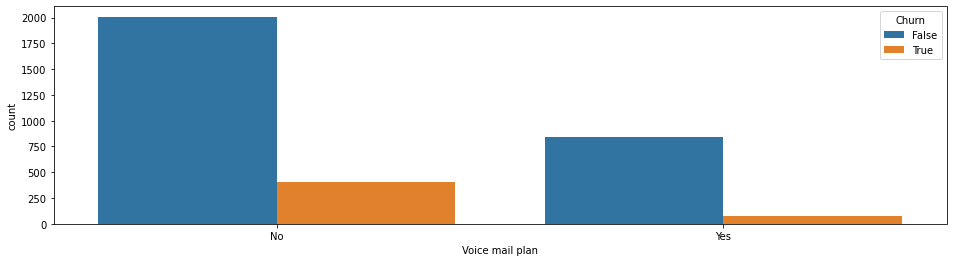

In [13]:
#Voice mail plan 
plt.figure(figsize=(16,4))
ax=sns.countplot(x='Voice mail plan',hue='Churn',data=dataset,order=dataset['Voice mail plan'].value_counts().index)
print(round((100*dataset['Voice mail plan'].value_counts()/len(dataset['Voice mail plan'])),2))
dataset[['Voice mail plan','Churn']].groupby(['Voice mail plan'],
        as_index=False).mean().sort_values(by ='Churn',ascending= False);

1    35.43
2    22.77
0    20.91
3    12.87
4     4.98
5     1.98
6     0.66
7     0.27
9     0.06
8     0.06
Name: Customer service calls, dtype: float64


,Customer service calls,Churn
9,9,1.000000
6,6,0.636364
5,5,0.606061
7,7,0.555556
8,8,0.500000
4,4,0.457831
0,0,0.131994
2,2,0.114625
1,1,0.103302
3,3,0.102564


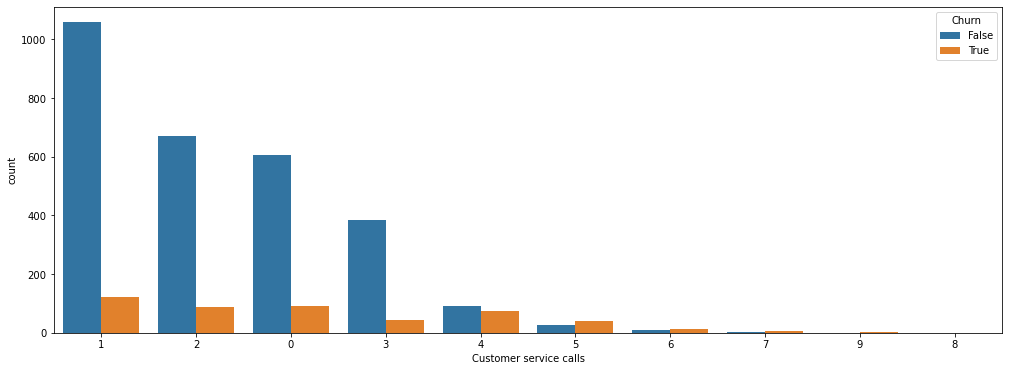

In [14]:
#Customer service calls
plt.figure(figsize=(17,6))
sns.countplot(x='Customer service calls',hue='Churn',data=dataset,order=dataset['Customer service calls'].value_counts().index)
print(round(100*dataset['Customer service calls'].value_counts()/len(dataset['Customer service calls']),2))
dataset[['Customer service calls','Churn']].groupby(['Customer service calls'],
                                                    as_index=False).mean().sort_values(by ='Churn',ascending= False)

As the no of Customer service Calls are increasing from the customer the customers are leaving. It can be seen that from the total no of customer who made 4 calls 45.78% churn from them and the churn percentage is increasing with the incresing Customer service calls. 

In [15]:
#convert non-numerical columns to numerical
train_df = train 
test_df = test 
train_df["Churn"] = train["Churn"].astype("int64")
test_df["Churn"]  = test["Churn"].astype("int64")

In [16]:
train_df["International plan"].replace(['Yes','No'],[1,0],inplace=True)
test_df["International plan"].replace(['Yes','No'],[1,0],inplace=True)
train_df["Voice mail plan"].replace(['Yes','No'],[1,0],inplace=True)
test_df["Voice mail plan"].replace(['Yes','No'],[1,0],inplace=True)

In [17]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [18]:
train_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

## Feature selection 

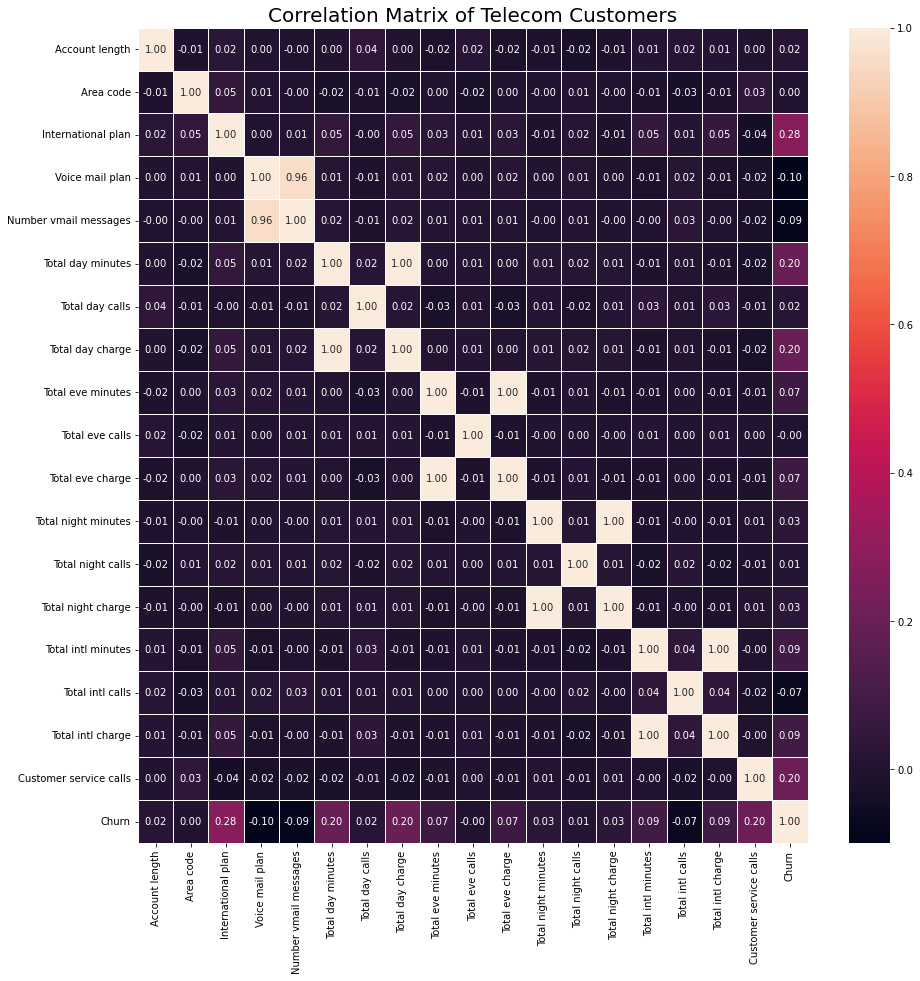

In [19]:
#correlation matrix 
corr_matrix = train_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

From the correlation matrix generated above, we can see that there are variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them.

In [20]:
#drop the highly correlated variable 
train_features = train_df.drop(['Voice mail plan','State','Total night charge','Total intl charge',
                                'Total eve charge','Total day charge'],axis='columns')
test_features = test_df.drop(['Voice mail plan','State','Total night charge','Total intl charge',
                              'Total eve charge','Total day charge'],axis='columns')

In [21]:
test_features.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,408,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,415,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,415,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1
3,111,415,0,0,110.4,103,137.3,102,189.6,105,7.7,6,2,0
4,49,510,0,0,119.3,117,215.1,109,178.7,90,11.1,1,1,0


In [22]:
train_features.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [23]:
train_features.columns

Index(['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

# Model building

In [24]:
X_train =  train_features.drop('Churn',axis='columns')
Y_train =  train_features['Churn']

X_test = test_features.drop('Churn',axis='columns')
Y_test = test_features['Churn']

X_train.shape , Y_train.shape, X_test.shape, Y_test.shape

((2666, 13), (2666,), (667, 13), (667,))

# Model 1 : Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
Y_predict = logmodel.predict(X_test)

Train_score = logmodel.score(X_train,Y_train)
print("Train score Acurracy:",Train_score)

Train score Acurracy: 0.8552138034508627


In [26]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

logmodel_acc         = accuracy_score(Y_test, Y_predict)
classReport         = classification_report(Y_test, Y_predict)
confMatrix          = confusion_matrix(Y_test, Y_predict) 
          
print(); print('Evaluation of the test model: ')
print(); print('Accuracy : ', logmodel_acc  )
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the test model: 

Accuracy :  0.8575712143928036

Confusion Matrix :
 [[563   9]
 [ 86   9]]

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       572
           1       0.50      0.09      0.16        95

    accuracy                           0.86       667
   macro avg       0.68      0.54      0.54       667
weighted avg       0.82      0.86      0.81       667



# Model 2 : Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree =  DecisionTreeClassifier(criterion = "gini",max_depth = 5,random_state = 100)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)

Train_score = round(dtree.score(X_train,Y_train),4)
print("Train score Acurracy:",Train_score)

Train score Acurracy: 0.9509


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_acc        = accuracy_score(Y_test, predictions)
classReport         = classification_report(Y_test, predictions)
confMatrix          = confusion_matrix(Y_test, predictions) 
          
print(); print('Evaluation of the test model: ')
print(); print('Accuracy : ', decision_acc  )
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the test model: 

Accuracy :  0.9505247376311844

Confusion Matrix :
 [[558  14]
 [ 19  76]]

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       572
           1       0.84      0.80      0.82        95

    accuracy                           0.95       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



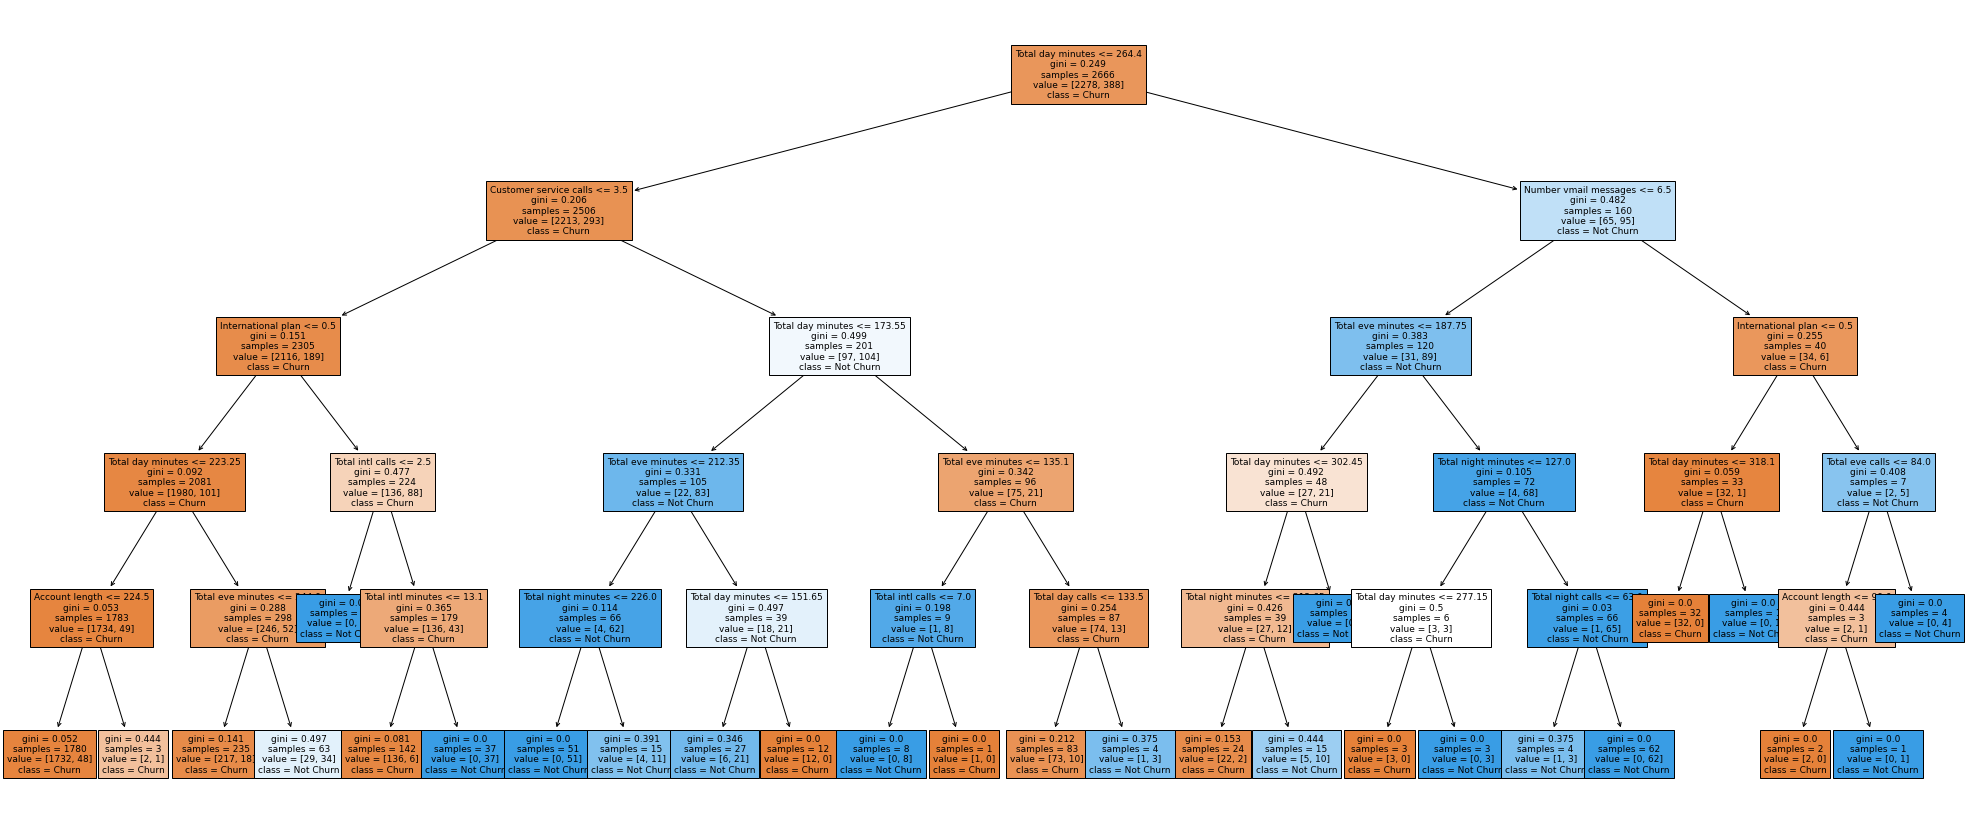

In [29]:
fn=['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls']
cn = ['Churn','Not Churn']
fig,axes = plt.subplots(figsize = (35,15)) 
tree.plot_tree(dtree,feature_names = fn,class_names = cn,filled=True,fontsize=9);

# Model 3 : Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators = 120,criterion = "gini",random_state = 101 ,max_depth = 7) 
Classifier.fit(X_train,Y_train)
Y_predict = Classifier.predict(X_test)

Train_score = Classifier.score(X_train,Y_train)
print("Train score Acurracy:",Train_score) 

Train score Acurracy: 0.9628657164291072


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

random_acc          = accuracy_score(Y_test, Y_predict)
classReport         = classification_report(Y_test, Y_predict)
confMatrix          = confusion_matrix(Y_test, Y_predict) 
          
print('Evaluation of the test model: ')
print(); print('Accuracy : ', random_acc )
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)

Evaluation of the test model: 

Accuracy :  0.9400299850074962

Confusion Matrix :
 [[572   0]
 [ 40  55]]

Classification Report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       572
           1       1.00      0.58      0.73        95

    accuracy                           0.94       667
   macro avg       0.97      0.79      0.85       667
weighted avg       0.94      0.94      0.93       667



# Model 4 : xgboost

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,confusion_matrix 

xg_model= XGBClassifier(random_state = 101) 
xg_model.fit(X_train, Y_train) 
xg_pred_test = xg_model.predict(X_test) 
xg_conf_matrix = confusion_matrix(Y_test, xg_pred_test) 

print(f'Test accuracy :\n {accuracy_score(Y_test,xg_pred_test)}')
print("confusion matrix:\n",xg_conf_matrix) 
print("-------------------------------------------") 
print("ClassificAation report : \n",classification_report(Y_test,xg_pred_test)) 

Test accuracy :
 0.9580209895052474
confusion matrix:
 [[565   7]
 [ 21  74]]
-------------------------------------------
ClassificAation report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.91      0.78      0.84        95

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



We will be using Randomized search for best possible parameters.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params={"n_estimators":[10,20,50,100,120],
        "max_depth":[3,4,5,6,7],
        "learning_rate":[0.05,0.5,1,10]}

rsearch=RandomizedSearchCV(xg_model,param_distributions=params,n_iter=10,n_jobs=-1,scoring='roc_auc',cv=5,
                           verbose=5,random_state=10)
r= rsearch.fit(X_train,Y_train)
r.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 120, 'max_depth': 6, 'learning_rate': 0.05}

In [34]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(n_estimators=120,max_depth=6,learning_rate=0.05,random_state=101)
xg_model.fit(X_train,Y_train)
xg_model_test = xg_model.predict(X_test)

Train_score = xg_model.score(X_train,Y_train)
print("Train score Acurracy:",Train_score)  

Train score Acurracy: 0.9801200300075019


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

xg_conf = confusion_matrix(Y_test,xg_model_test)
xg_acc = accuracy_score(Y_test,xg_model_test)
xg_cal = classification_report(Y_test,xg_model_test)
print('Evaluation of the test model: ')
print();print('Test accuracy :\n',xg_acc)
print();print("confusion matrix:\n",xg_conf) 
print();print("ClassificAation report : \n",xg_cal) 

Evaluation of the test model: 

Test accuracy :
 0.9625187406296851

confusion matrix:
 [[566   6]
 [ 19  76]]

ClassificAation report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.93      0.80      0.86        95

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



# Model evaluation

In [36]:
models = pd.DataFrame({
    'Model':['LogisticRegression','Decision Tree','Random Forest','XGBoost'],
    'Score':[logmodel_acc,decision_acc ,random_acc,xg_acc ]})
models.sort_values(by = 'Score',ascending = False)

,Model,Score
3,XGBoost,0.962519
1,Decision Tree,0.950525
2,Random Forest,0.940030
0,LogisticRegression,0.857571


The best model is Xgboost having train accuracy of 96.25%. 

##                                                          Thank You 